# Pymaceuticals Inc.
---

### Analysis

- looks like as mouse wieght goes up so does tumor vol. This definetly makes sense given that tumors would add to mass and that more tissue means more replications which means more oppurtunity for cancerous cells are made.
- I picked S185 for my single mouse on Capomulin and in this mouses case the drug seemed to work as time went on its tumour shrunk. Lets go S185!
- of the drugs we picked it seems the sample size was fairly distributed with gender, number of mice on the drugs, and starting tumor size. 
 

In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data=pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
merged_data.head()

#added numpy but ended up not needing it then imported linregress

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
number_of_mice=len(merged_data['Mouse ID'].unique())
print(number_of_mice)

249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_ID_T=merged_data[merged_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicated_ID=duplicated_ID_T['Mouse ID'].unique()

print(duplicated_ID)
# I know in SQL there is a dupliacte function so i googled for python and used it.

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
sorted_df=merged_data.loc[merged_data["Mouse ID"]=="g989"]
sorted_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=merged_data.loc[merged_data["Mouse ID"]!="g989"]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean=len(clean_data['Mouse ID'].unique())
print(number_of_mice_clean)

248


## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drugs=clean_data.groupby('Drug Regimen')


In [28]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stat_sum=drugs['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
stat_sum


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

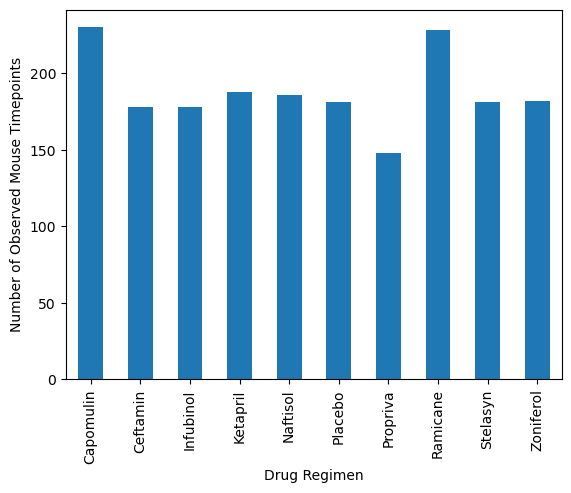

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen=drugs['Mouse ID'].count()
regimen.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.show()

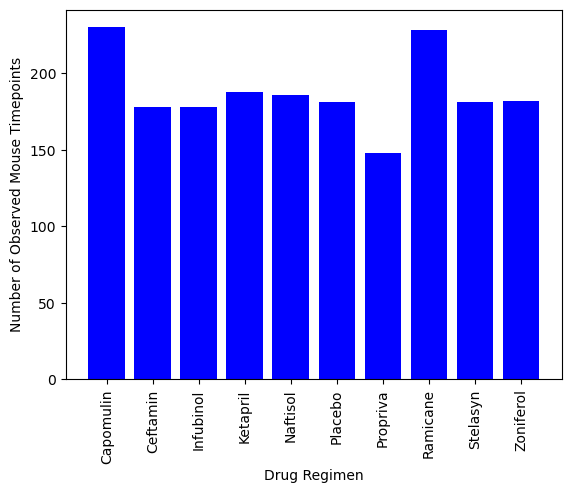

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_axis=drugs['Mouse ID'].count()
plt.bar(y_axis.index,list(y_axis) ,color='b')
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.show()

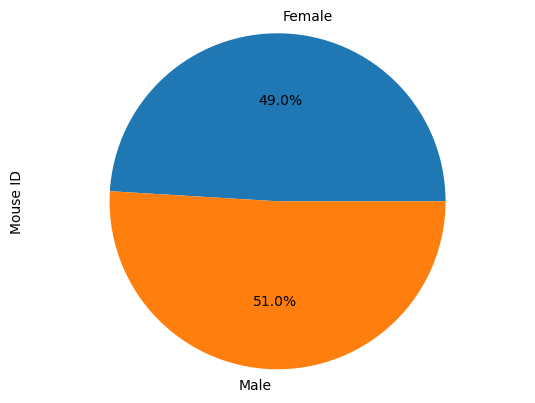

In [42]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_group=clean_data.groupby('Sex')
gender=gender_group['Mouse ID'].count()

# Make the pie chart
gender.plot(kind='pie',autopct="%1.1f%%")
plt.axis("equal")
plt.show()

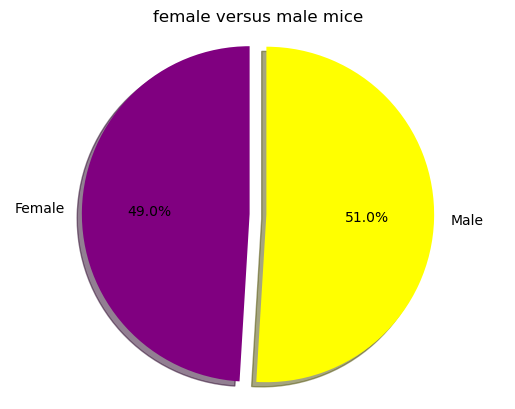

In [60]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_group=clean_data.groupby('Sex')
gender=gender_group['Mouse ID'].count()
# Make the pie chart
colors=['purple','yellow']
explode=(0.1,0)
plt.pie(gender, explode=explode, labels=gender.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("female versus male mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [129]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor=clean_data.groupby('Mouse ID')
tumor_time=tumor["Timepoint"].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_tumor = pd.merge(clean_data, tumor_time, on=['Mouse ID', 'Timepoint'], how="right").reset_index()
merged_tumor_filtered=(merged_tumor[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)', 'Timepoint']])
merged_tumor_filtered.head()       
# it took alot of research to mearge on id and timepoint with how being right becasuse i hept getting multiple volumes for max timepoint!!!!

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint
0,a203,Infubinol,67.973419,45
1,a251,Infubinol,65.525743,45
2,a262,Placebo,70.717621,45
3,a275,Ceftamin,62.999356,45
4,a366,Stelasyn,63.440686,30


In [121]:
# Put treatments into a list for for loop (and later for plot labels)
treatments ='Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol={}
# Determine outliers using upper and lower bounds
def calculate_outliers(data, treatments):
    quartiles = data['Tumor Volume (mm3)'].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = data.loc[(data['Tumor Volume (mm3)'] < lower_bound) | (data['Tumor Volume (mm3)'] > upper_bound)]
    print(f"{regimen}'s potential outliers: {outliers['Tumor Volume (mm3)']}")



# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in treatments:
    regimen_data = merged_tumor_filtered[merged_tumor_filtered['Drug Regimen'] == regimen]
    calculate_outliers(regimen_data, regimen)

# I like writing things out in functions I got most of that form the exapmle in class then looped the function.


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


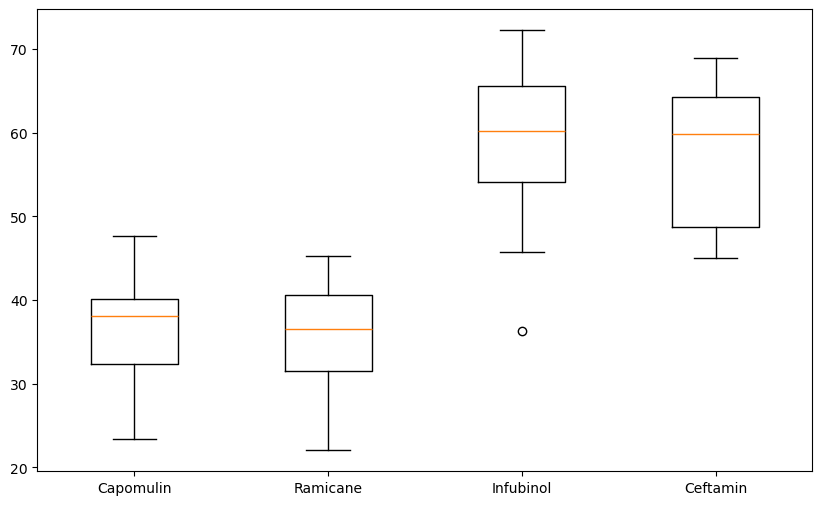

In [91]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_vol_data = [CRIC[CRIC['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments]
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments)
plt.show()

## Line and Scatter Plots

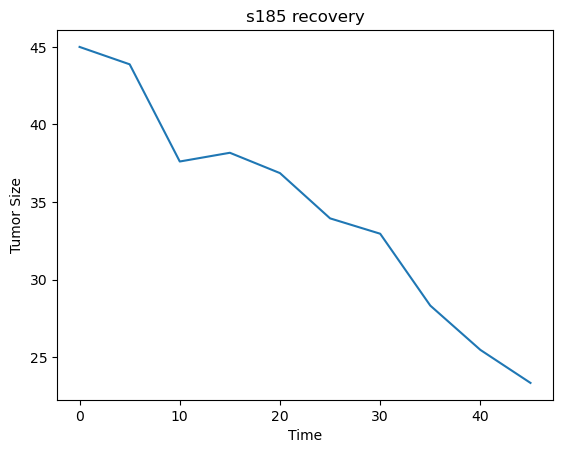

In [122]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap=clean_data.loc[clean_data['Drug Regimen']=="Capomulin"]
cap_s185=cap.loc[cap['Mouse ID']=="s185"]
run=cap_s185['Timepoint']
rise=cap_s185['Tumor Volume (mm3)']
plt.plot(run,rise)
plt.title("s185 recovery")
plt.xlabel("Time")
plt.ylabel("Tumor Size")
plt.show()

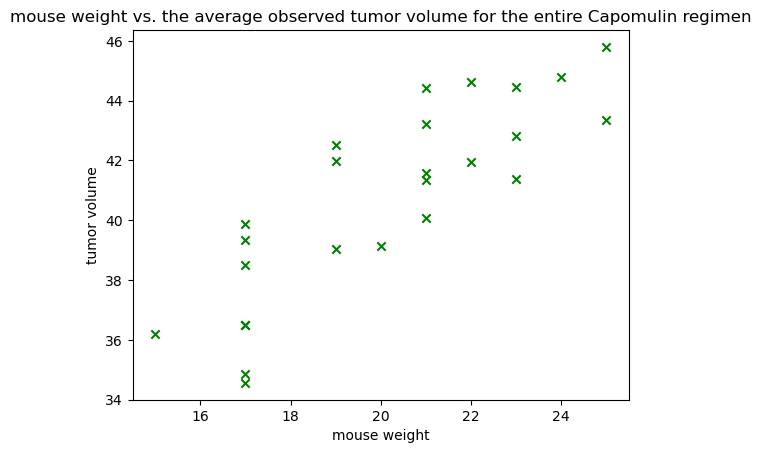

In [125]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight=cap[['Mouse ID', 'Weight (g)']].drop_duplicates()
aotv=cap.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
graph=pd.merge(aotv, mouse_weight, on='Mouse ID')
plt.scatter(graph['Weight (g)'], graph['Tumor Volume (mm3)'], marker="x", facecolors="green")
plt.title('mouse weight vs. the average observed tumor volume for the entire Capomulin regimen')
plt.xlabel('mouse weight')
plt.ylabel('tumor volume')
plt.show()

# this section gave me a lot of trouble. I could not get it to look right then using drop duplicates and then creating a new df made it much easier!

## Correlation and Regression

The correlation between both factors is 0.84


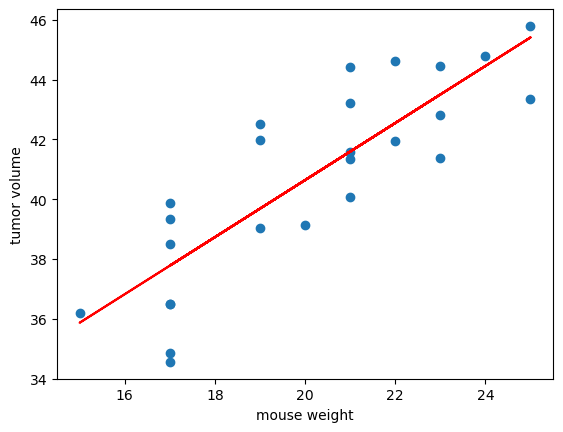

In [128]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(graph['Weight (g)'],graph['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(graph['Weight (g)'], graph['Tumor Volume (mm3)'])
regress_values = graph['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(graph['Weight (g)'],graph['Tumor Volume (mm3)'])
plt.plot(graph['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('mouse weight')
plt.ylabel('tumor volume')
plt.show()

# i imported linregress like we did in the activites